Rough calculations with geopandas tool

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import haversine as hs
import geopandas as gp
from shapely.geometry import Point, Polygon
from pyomo.util.infeasible import log_infeasible_constraints, log_infeasible_bounds

In [2]:
states = gp.read_file('/Users/mhardika/Documents/AMO/GeoToolAll_Methods/GeoData/USA/usa-states-census-2014.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [3]:
texas_centroid = gp.read_file('/Users/mhardika/Documents/AMO/GeoToolAll_Methods/GeoData/Texas Counties Centroid Map/geo_export_d58b4a94-13f1-42f4-b03f-567c0e3ad095.shp')
texas = gp.read_file('/Users/mhardika/Documents/AMO/GeoToolAll_Methods/GeoData/Texas Counties Map/geo_export_c05b3355-1638-4e46-b56c-ac18de751ed8.shp')

In [4]:
bw_df = pd.read_csv('/Users/mhardika/Documents/AMO/GeoToolAll_Methods/Water Source Data/Brackish/USGS_brackish_filtered_all.csv')
long = bw_df[bw_df['state_alpha']=='TX']['Longitude']
lat = bw_df[bw_df['state_alpha']=='TX']['Latitude']


In [5]:
bw_df[bw_df['state_alpha'] =='TX']['county_nm'].values

array(['Cameron', 'Willacy', 'Starr', ..., 'Dallam', 'Hansford', 'Beaver'],
      dtype=object)

In [6]:
geometry = [Point(xy) for xy in zip(long,lat)]
# data = {'county_nm': bw_df[bw_df['state_alpha'] =='TX']['county_nm'].values, 'geometry': geometry }

geo_df = gp.GeoDataFrame(geometry = geometry, crs='EPSG:4326')

geo_df.geometry = geo_df.geometry.to_crs('EPSG:4326')

geo_df = geo_df.assign(county_nm = bw_df[bw_df['state_alpha'] =='TX']['county_nm'].values)

print(geo_df.geometry)

0         POINT (-97.79169 26.29167)
1         POINT (-97.78058 26.48889)
2         POINT (-98.90003 26.66667)
3         POINT (-98.44172 27.60000)
4         POINT (-96.40836 28.35000)
                    ...             
69594    POINT (-100.13011 36.37592)
69595    POINT (-102.63071 36.39484)
69596    POINT (-102.73949 36.44673)
69597    POINT (-101.14390 36.45011)
69598    POINT (-100.11623 36.49976)
Name: geometry, Length: 69599, dtype: geometry


In [339]:
geo_df.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [345]:
geo_df = geo_df.to_crs("EPSG:3395")
geo_df

,geometry,county_nm
0,POINT (-10886121.624 3016329.361),Cameron
1,POINT (-10884884.742 3040706.355),Willacy
2,POINT (-11009500.734 3062716.227),Starr
3,POINT (-10958482.388 3178844.757),Duval
4,POINT (-10732129.666 3272887.402),Calhoun
...,...,...
69594,POINT (-11146433.048 4327128.813),Lipscomb
69595,POINT (-11424798.867 4329733.230),Dallam
69596,POINT (-11436907.344 4336880.713),Dallam
69597,POINT (-11259287.222 4337346.412),Hansford


In [333]:
states.crs 

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - between 80°S and 84°N
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [334]:
texas.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - between 80°S and 84°N
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [371]:
states = states.to_crs("EPSG:3395")
texas = texas.to_crs("EPSG:4326")
texas_centroid = texas_centroid.to_crs("EPSG:4326")


In [372]:
texas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

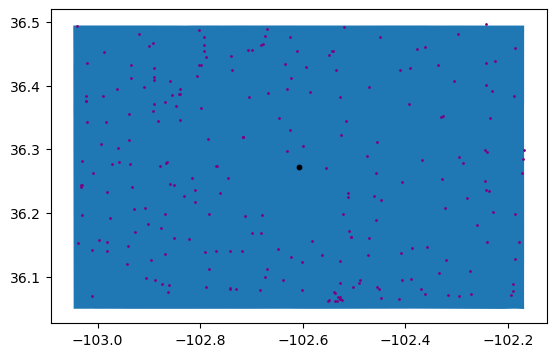

In [373]:
fig, ax = plt.subplots()
# states[states['NAME'] == 'Texas'].plot(ax=ax,figsize=(20, 20))
texas[texas['name']=='Dallam'].plot(ax=ax,figsize=(50, 50))
texas_centroid[texas_centroid['cnty_nm']=='Dallam'].plot(ax=ax, color = 'black', markersize = 10)
geo_df[geo_df['county_nm']=='Dallam'].plot(ax=ax, color='purple', markersize = 1)

In [438]:
# Distance between centroid and
loc2_long = texas_centroid[texas_centroid['cnty_nm']=='Dallam'].geometry.x.values
loc2_lat = texas_centroid[texas_centroid['cnty_nm']=='Dallam'].geometry.y.values

loc2 = (loc2_lat,loc2_long)


# loc2 = loc2.to_crs('EPSG:3035')
# print(loc2)
county = bw_df[bw_df['county_nm']=='Dallam']
long = county['Longitude']
lat = county['Latitude']
# loc1 = county.geometry
# print(loc1.iloc[0])
# loc1 = loc1.to_crs('EPSG:3035')
# print(loc1.iloc[0])

loc1_list = tuple(zip(lat,long)) 

print(loc1_list[0])
print(loc2)
hs.haversine(loc1_list[0],loc2)


# dist_km = []

# for loc1 in loc1_list:
#     dist_km.append(hs.haversine(loc1,loc2))

# print(loc2.distance(loc1.iloc[0],align=False))



(36.0694, -103.0106)
(array([36.27777107]), array([-102.6021647]))


43.369161130210706

<AxesSubplot: >

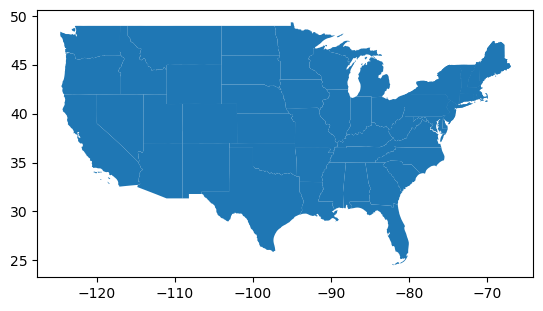

In [68]:
states.plot()

In [13]:
# Trying to add LCOW optimization function
from pyomo.environ import Var, Expression, NonNegativeReals, Block, ConcreteModel, Constraint, Objective, Param, maximize, SolverFactory
from idaes.core import FlowsheetBlock
# transport_cost = 0.005 # $/m3/km
LCOW = 0.8 # $/m3
distance = 0.5 #km
vol = 0.20

def transport_cost(vol):
    if vol <= 0.1:
        return 0.005
    else:
        return 0.005

m = ConcreteModel()
m.fs = FlowsheetBlock(default={'dynamic': False})
m.fs.vol = Var(initialize = vol, domain = NonNegativeReals)
m.fs.distance = Param(initialize = distance)

m.LCOW_obj =   2- (transport_cost(m.fs.vol.value)*m.fs.vol*m.fs.distance + LCOW*m.fs.vol)

m.objective_function = Objective(expr = m.fs.vol , sense=maximize)
m.con1 = Constraint(expr= m.fs.vol <=50)
m.con2 = Constraint(expr= (0 == m.LCOW_obj))

solver = SolverFactory('ipopt')

results = solver.solve(m)

m.display()


Model unknown

  Variables:
    None

  Objectives:
    objective_function : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 2.492211838006231

  Constraints:
    con1 : Size=1
        Key  : Lower : Body              : Upper
        None :  None : 2.492211838006231 :  50.0
    con2 : Size=1
        Key  : Lower : Body : Upper
        None :   0.0 :  0.0 :   0.0

  Blocks:
    Block fs
    
      Variables:
        vol : Size=1, Index=None
            Key  : Lower : Value             : Upper : Fixed : Stale : Domain
            None :     0 : 2.492211838006231 :  None : False : False : NonNegativeReals
    
      Objectives:
        None
    
      Constraints:
        None


In [16]:
from pyomo.environ import Var, Expression, NonNegativeReals, Block, ConcreteModel, Constraint, Objective, Param, maximize, SolverFactory,RangeSet
import pyomo.environ as pyo
from idaes.core import FlowsheetBlock
import numpy as np

m = ConcreteModel()

bw_vol = np.array([0.05,0.06,0.03])
dist =  np.array([200,400,100])
LCOW = np.array([0.2,0.1,0.4])
transport_cost = 0.01
demand = 0.1

transport_coeff = bw_vol*dist*transport_cost

I = range(len(dist))
m.x = Var(I,domain=NonNegativeReals,bounds= (0,1))

# Production objective
m.constraint1 = Constraint(expr = (sum(bw_vol[i]*m.x[i] for i in I) ) >= demand)

# LCOW objective
def obj(m):
    return  sum(LCOW[i]*m.x[i] + transport_coeff[i]*m.x[i] for i in I)

m.obj1 = Objective(rule = obj)

solver = SolverFactory('ipopt')

results = solver.solve(m)

m.display()



Model unknown

  Variables:
    x : Size=3, Index=x_index
        Key : Lower : Value              : Upper : Fixed : Stale : Domain
          0 :     0 : 0.8000000028614032 :     1 : False : False : NonNegativeReals
          1 :     0 : 0.9999998380502686 :     1 : False : False : NonNegativeReals
          2 :     0 :                0.0 :     1 : False : False : NonNegativeReals

  Objectives:
    obj1 : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 0.5799999457955123

  Constraints:
    constraint1 : Size=1
        Key  : Lower : Body                : Upper
        None :   0.1 : 0.09999999042608627 :  None


In [64]:
print(log_infeasible_constraints(m))

INFO: CONSTR constraints[3]: 1.0 </= 0.0868155471507761
INFO: CONSTR constraints[4]: 0.3 </= 0.01978152034301001
INFO: CONSTR constraints[5]: 0.1 </= 0.0034029336044068357
None


In [66]:
lb_value =0 
for constr in m.component_data_objects(ctype=Constraint, active=True, descend_into=True):
    tol=1E-6
    constr_body_value = value(constr.body, exception=False)
    constr_lb_value = value(constr.lower, exception=False)
    constr_ub_value = value(constr.upper, exception=False)
    
    constr_undefined = False
    equality_violated = False
    lb_violated = False
    ub_violated = False    
    
    if constr_body_value is None:
            # Undefined constraint body value due to missing variable value
        constr_undefined = True
        pass
    else:
        # Check for infeasibilities
        if constr.equality:
            if fabs(constr_lb_value - constr_body_value) >= tol:
                equality_violated = True
                print(constr)
                # constr.deactivate()
                
        else:
            if constr.has_lb() and constr_lb_value - constr_body_value >= tol:
                    lb_violated = True
                    if lb_value < (constr_lb_value):
                        lb_value =  constr_lb_value
                        constr_deactivate = constr
                    
                    # print(constr)
                    # constr.deactivate()
                    
            if constr.has_ub() and constr_body_value - constr_ub_value >= tol:
                    ub_violated = True
                    print(constr)
                    # constr.deactivate()
                   

constr_deactivate.deactivate()
m.display()
results = solver.solve(m)
# print(constr_deactivate)

Model unknown

  Variables:
    x : Size=6, Index=matrix
        Key    : Lower : Value               : Upper : Fixed : Stale : Domain
        (0, 0) :     0 :                 0.0 :     1 : False : False : NonNegativeReals
        (0, 1) :     0 :  0.7607442470626785 :     1 : False : False : NonNegativeReals
        (0, 2) :     0 : 0.23925577290104916 :     1 : False : False : NonNegativeReals
        (1, 0) :     0 :                 0.0 :     1 : False : False : NonNegativeReals
        (1, 1) :     0 :  0.8339840136399875 :     1 : False : False : NonNegativeReals
        (1, 2) :     0 :   0.166016006329819 :     1 : False : False : NonNegativeReals

  Objectives:
    obj1 : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 0.9103794470159629

  Constraints:
    constraints : Size=5
        Key : Lower : Body                 : Upper
          1 :  None :   1.0000000199637276 :   1.0
          2 :  None :   1.0000000199698065 :   1.0
          5 